/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
iter=0/10000


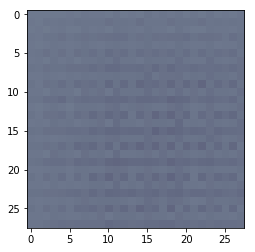

iter=100/10000


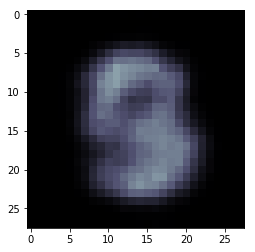

iter=200/10000


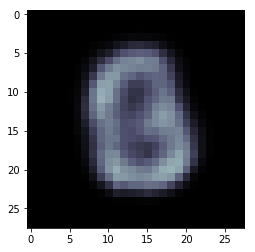

iter=300/10000


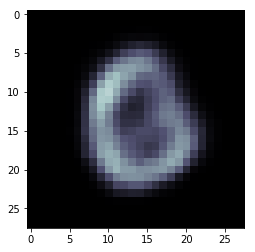

iter=400/10000


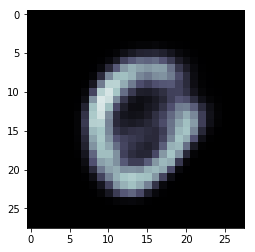

iter=500/10000


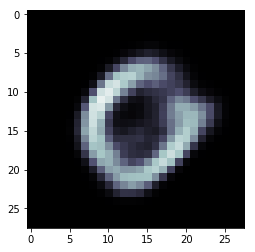

iter=600/10000


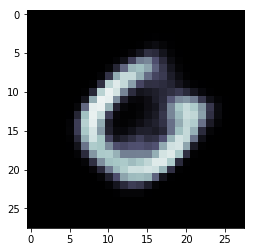

iter=700/10000


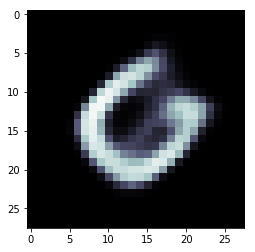

iter=800/10000


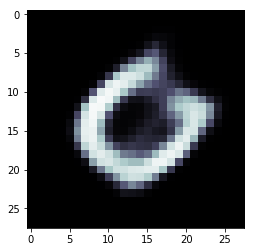

iter=900/10000


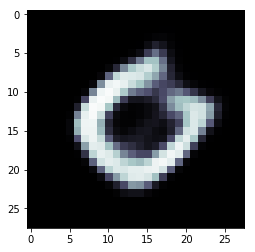

iter=1000/10000


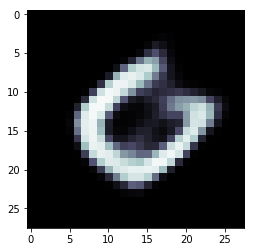

iter=1100/10000


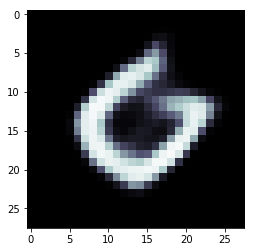

iter=1200/10000


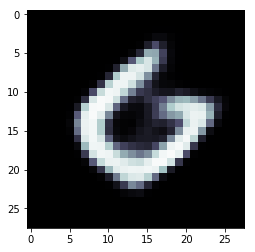

iter=1300/10000


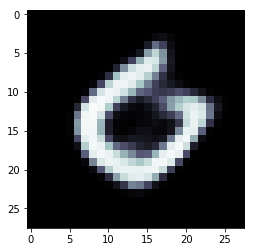

iter=1400/10000


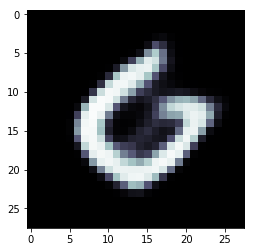

iter=1500/10000


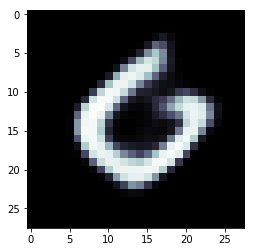

iter=1600/10000


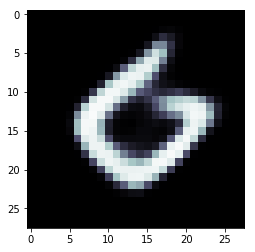

iter=1700/10000


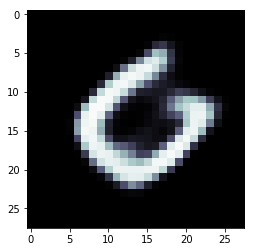

iter=1800/10000


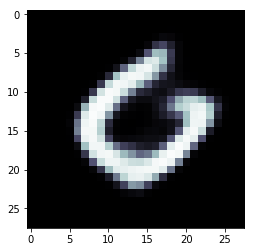

iter=1900/10000


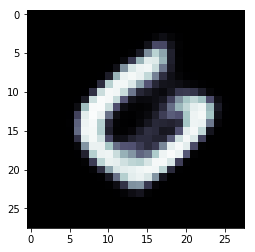

iter=2000/10000


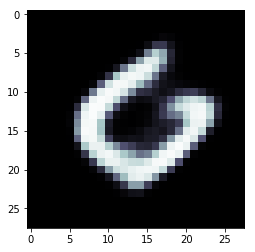

iter=2100/10000


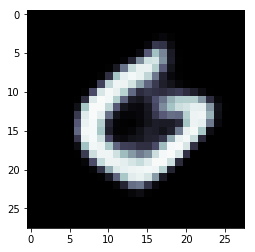

iter=2200/10000


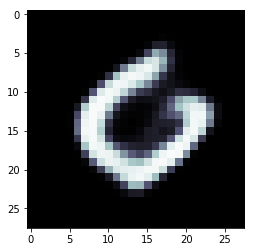

iter=2300/10000


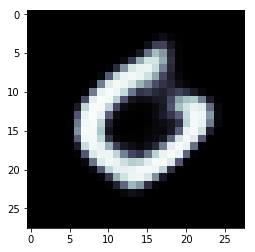

iter=2400/10000


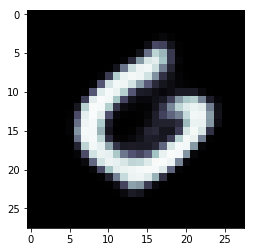

iter=2500/10000


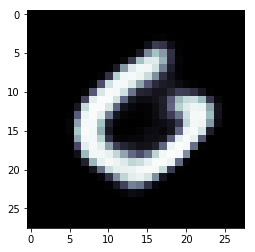

iter=2600/10000


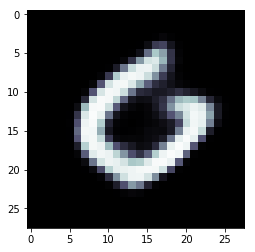

iter=2700/10000


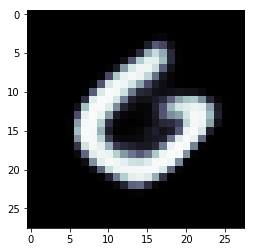

iter=2800/10000


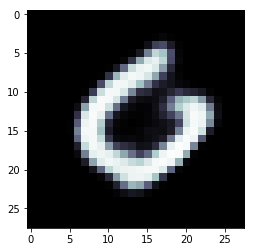

iter=2900/10000


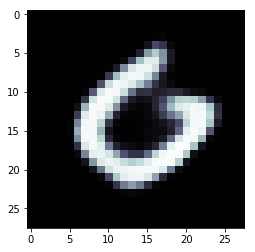

iter=3000/10000


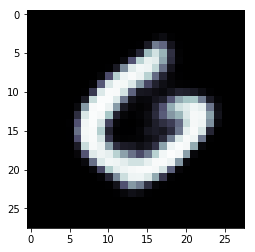

iter=3100/10000


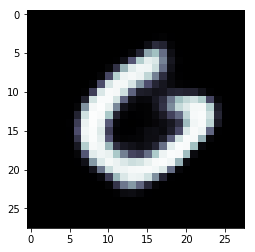

iter=3200/10000


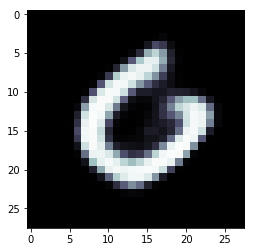

iter=3300/10000


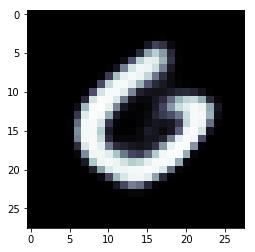

iter=3400/10000


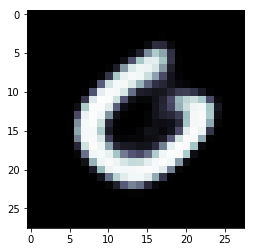

iter=3500/10000


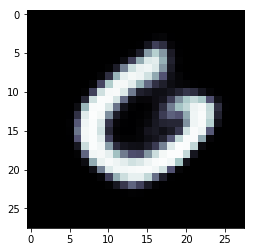

iter=3600/10000


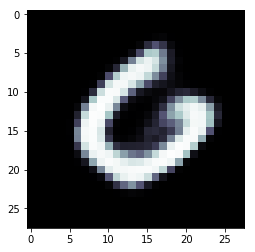

iter=3700/10000


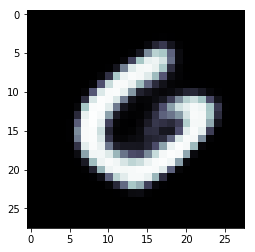

iter=3800/10000


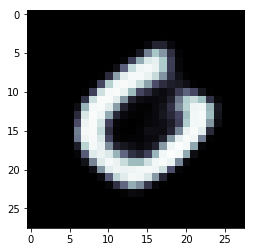

iter=3900/10000


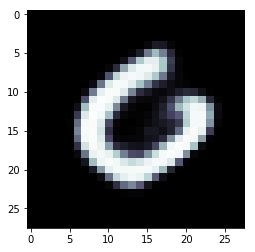

iter=4000/10000


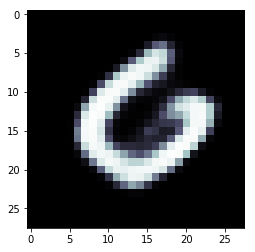

iter=4100/10000


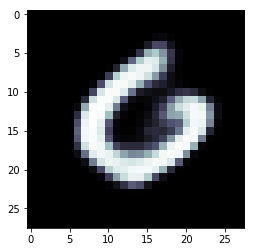

iter=4200/10000


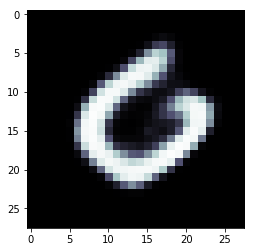

iter=4300/10000


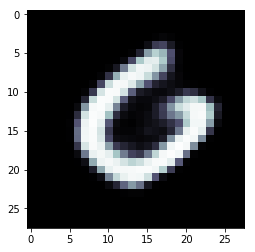

iter=4400/10000


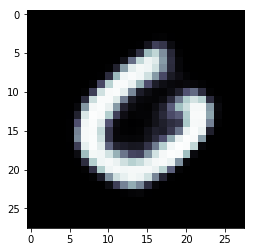

iter=4500/10000


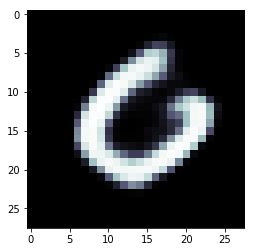

iter=4600/10000


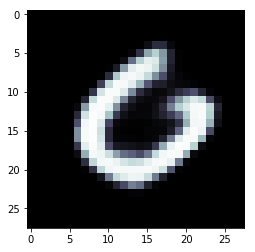

iter=4700/10000


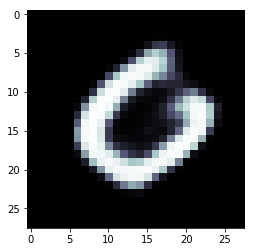

iter=4800/10000


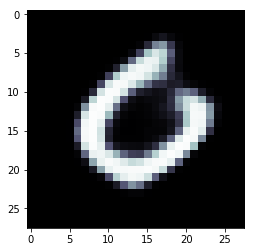

iter=4900/10000


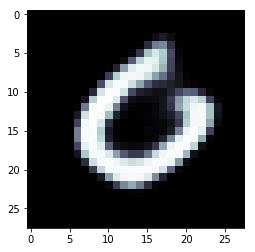

iter=5000/10000


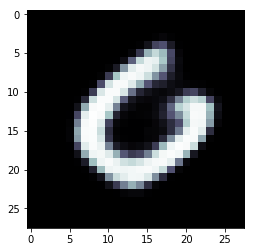

iter=5100/10000


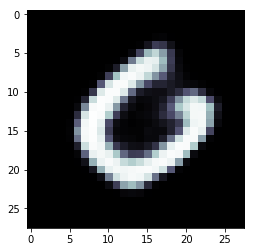

iter=5200/10000


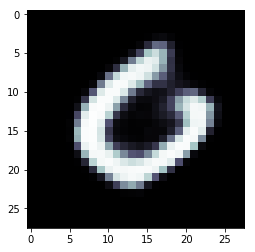

iter=5300/10000


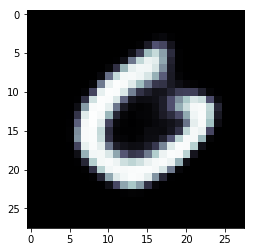

iter=5400/10000


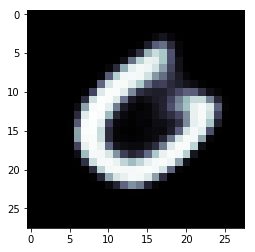

iter=5500/10000


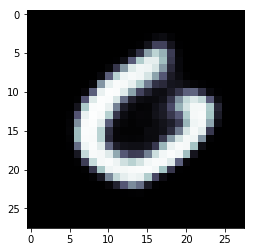

iter=5600/10000


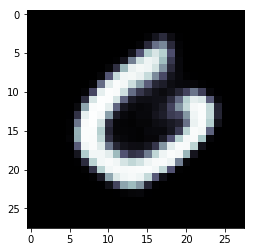

iter=5700/10000


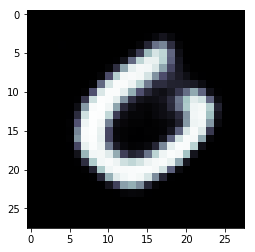

iter=5800/10000


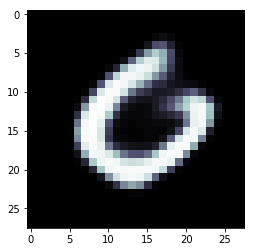

iter=5900/10000


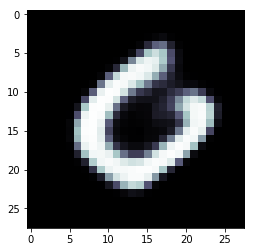

iter=6000/10000


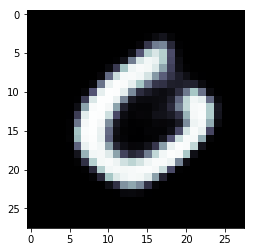

iter=6100/10000


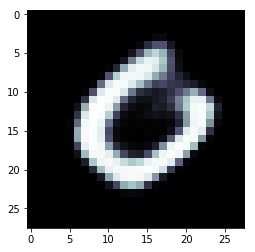

iter=6200/10000


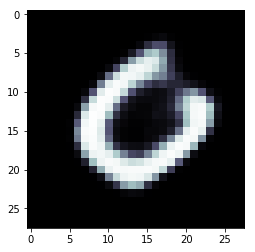

iter=6300/10000


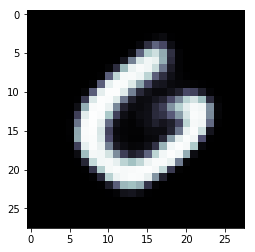

iter=6400/10000


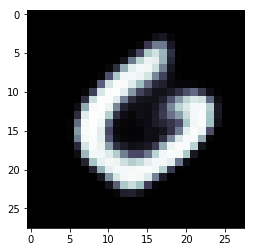

iter=6500/10000


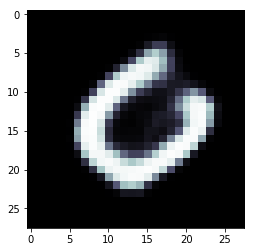

iter=6600/10000


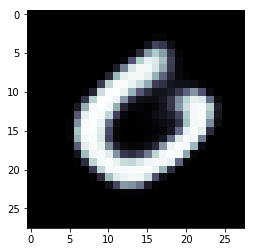

iter=6700/10000


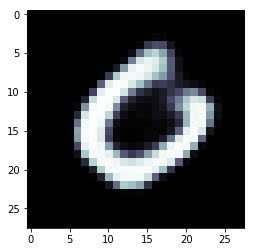

iter=6800/10000


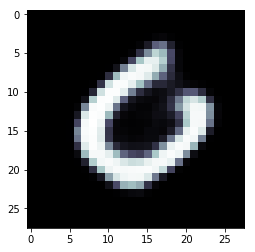

iter=6900/10000


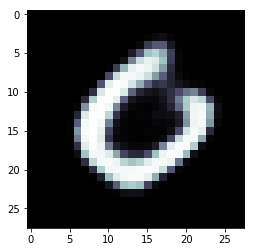

iter=7000/10000


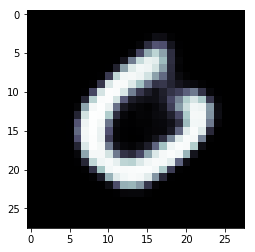

iter=7100/10000


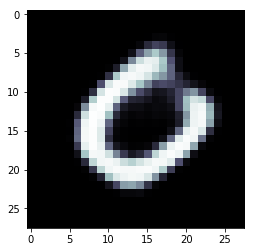

iter=7200/10000


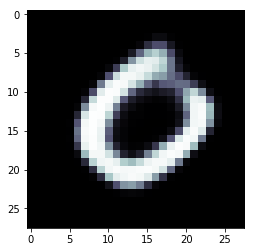

iter=7300/10000


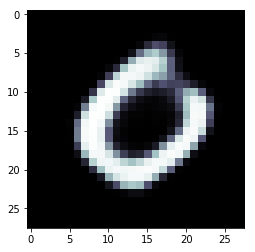

iter=7400/10000


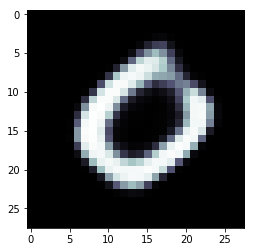

iter=7500/10000


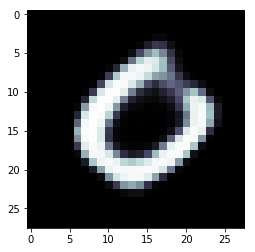

iter=7600/10000


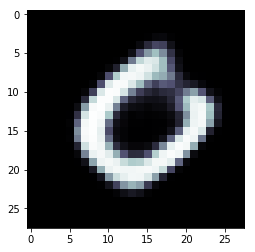

iter=7700/10000


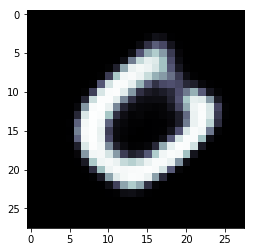

iter=7800/10000


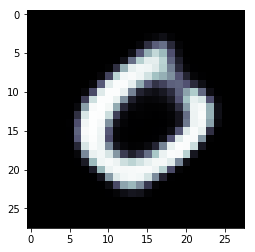

iter=7900/10000


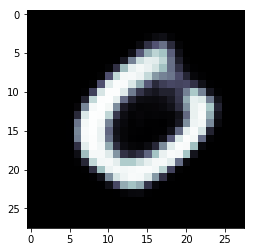

iter=8000/10000


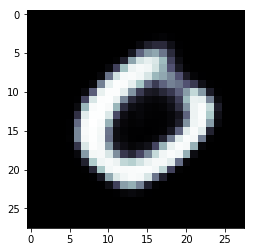

iter=8100/10000


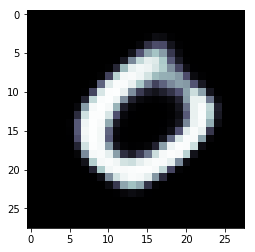

iter=8200/10000


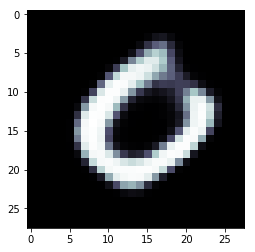

iter=8300/10000


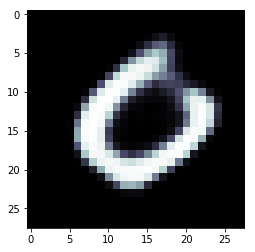

iter=8400/10000


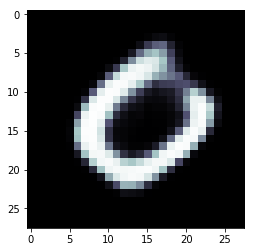

iter=8500/10000


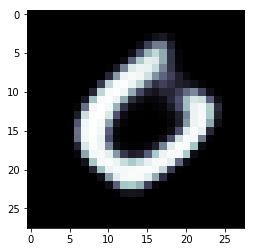

iter=8600/10000


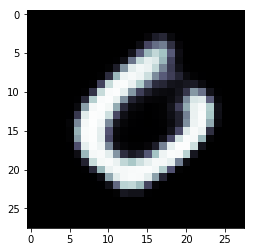

iter=8700/10000


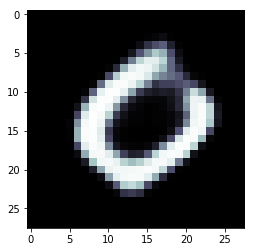

iter=8800/10000


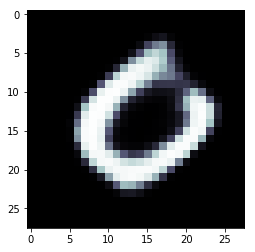

iter=8900/10000


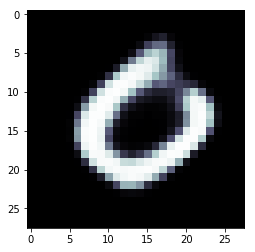

iter=9000/10000


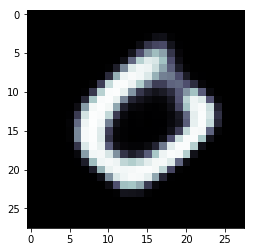

iter=9100/10000


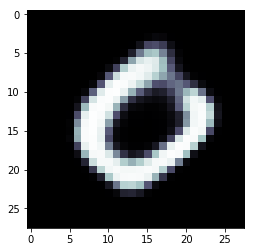

iter=9200/10000


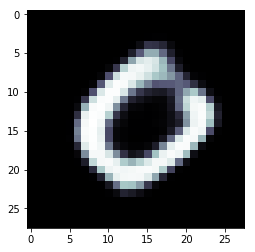

iter=9300/10000


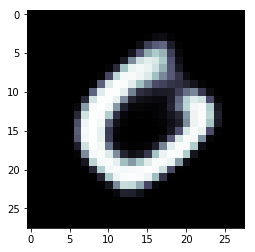

iter=9400/10000


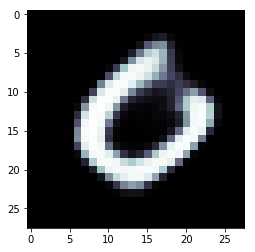

iter=9500/10000


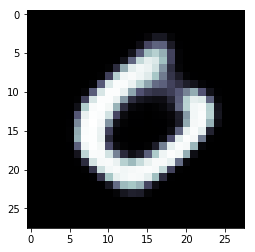

iter=9600/10000


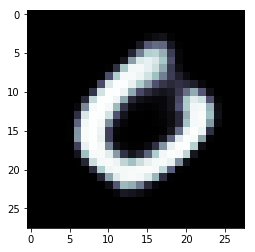

iter=9700/10000


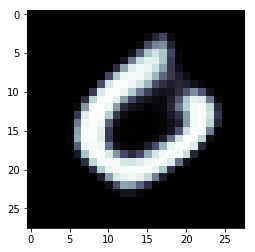

iter=9800/10000


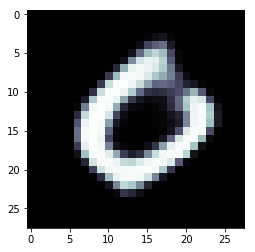

iter=9900/10000


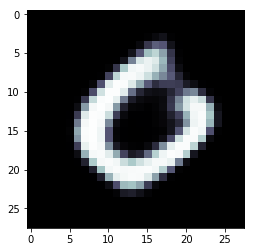

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib import layers
from tensorflow.examples.tutorials.mnist import input_data


session = tf.InteractiveSession()


with tf.name_scope('placeholders'):
    x_true = tf.placeholder(tf.float32, [None, 28, 28, 1])
    z = tf.placeholder(tf.float32, [None, 128])

with tf.name_scope('encoder'):
    x = layers.conv2d(x_true, num_outputs=64, kernel_size=5, stride=2)
    x = layers.conv2d(x, num_outputs=128, kernel_size=5, stride=2)
    x = layers.conv2d(x, num_outputs=256, kernel_size=5, stride=2)

    x = layers.flatten(x)
    mu = layers.fully_connected(x, num_outputs=128, activation_fn=None)
    logsigma = layers.fully_connected(x, num_outputs=128, activation_fn=None)
    sigma = tf.exp(logsigma)

with tf.name_scope('latent_variable'):
    #z = mu + tf.random_normal(tf.shape(sigma)) * sigma
    z= mu +tf.random_normal(tf.shape(sigma),mean=0.0,stddev=1.0)*sigma
with tf.name_scope('decoder'):
    x = layers.fully_connected(z, num_outputs=4096)
    x = tf.reshape(x, [-1, 4, 4, 256])

    x = layers.conv2d_transpose(x, num_outputs=128, kernel_size=5, stride=2)
    x = layers.conv2d_transpose(x, num_outputs=64, kernel_size=5, stride=2)
    x = layers.conv2d_transpose(x, num_outputs=1, kernel_size=5, stride=2,
                                activation_fn=None)
    logits = x[:, 2:-2, 2:-2 , :]
    reconstruction = tf.nn.sigmoid(logits)

with tf.name_scope('loss'):
    latent_losses = 0.5 * tf.reduce_sum(tf.square(mu) +
                                        tf.square(sigma) -
                                        tf.log(tf.square(sigma)) - 1,
                                        axis=1)

    reconstruction_losses = tf.reduce_sum(
        tf.nn.sigmoid_cross_entropy_with_logits(labels=x_true, logits=logits),
        axis=[1, 2, 3])
    loss = tf.reduce_mean(reconstruction_losses+latent_losses)

with tf.name_scope('optimizer'):
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-3)
    train = optimizer.minimize(loss)

tf.global_variables_initializer().run()

mnist = input_data.read_data_sets('MNIST_data')

for i in range(10000):
    batch = mnist.train.next_batch(100)
    images = batch[0].reshape([-1, 28, 28, 1])

    session.run(train, feed_dict={x_true: images})

    if i % 100 == 0:
        print('iter={}/10000'.format(i))
#         z_validate = np.random.randn(1, 128)
        
        z_validate=np.ones((1,128),dtype=None)  
        generated = reconstruction.eval(feed_dict={z: z_validate}).squeeze()

        plt.figure('results')
        plt.imshow(generated, clim=[0, 1], cmap='bone')
        plt.pause(0.001)
